<a href="https://colab.research.google.com/github/E-Juliet/E-Juliet/blob/main/Call_Centre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
calls = pd.read_excel ('/Calls Analysis.xlsx')
calls

,CALL,vosk-model-en-us-0.42-gigaspeech,Vosk-model-en-us-0.22,Vosk-model-small-en-us-0.15
0,Call428635799.wav,and if you didn't know manchester oh boy the w...,if you can do math history get the account num...,the key now market give up while not come from...
1,Call428376921.wav,jumble they didn't say thank you for investing...,kimball they didn't say thank you for the yaku...,i didn't say thank you for for veteran for i c...


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   CALL                              2 non-null      object
 1   vosk-model-en-us-0.42-gigaspeech  2 non-null      object
 2   Vosk-model-en-us-0.22             2 non-null      object
 3   Vosk-model-small-en-us-0.15       2 non-null      object
dtypes: object(4)
memory usage: 192.0+ bytes


In [6]:
# using DataFrame.rename() function

calls.rename(columns = {'vosk-model-en-us-0.42-gigaspeech': 'Model_1','Vosk-model-en-us-0.22': 'Model_2','Vosk-model-small-en-us-0.15': 'Model_3'}, inplace = True)

#print the name of new columns
print("Name of New Columns:", calls.columns)

Name of New Columns: Index(['CALL', 'Model_1', 'Model_2', 'Model_3'], dtype='object')


In [7]:
#Word Cloud
#Import necessary libraries


import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

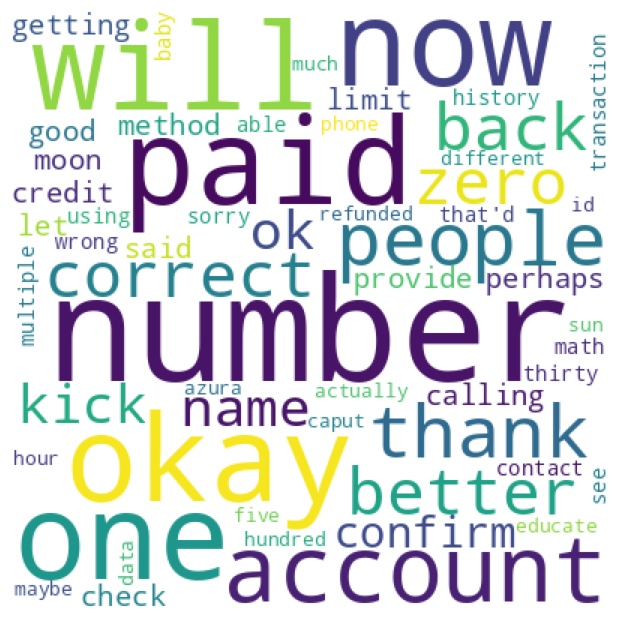

In [10]:
# Plot a word cloud
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in calls.Model_2:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (12, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [11]:
import numpy as np
import pandas as pd
import nltk
#download vader from nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#creating an object of sentiment intensity analyzer
Analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [14]:
#Showing the 1st Call
calls.Model_2[0]

"if you can do math history get the account number okay sorry about that you paid the correct people that the wrong account number the number or multiple my name ok for thirty again that'd be able to kick and see the transaction how can we confirm which baby so that we can provide you their contact you paid using this number or a different number the confirm one actually your name and id number educate the phone and you paid how much do we can maybe perhaps the five hundred the caput refunded the sun that has been to azura credit hour can the data momentary the azure credit have provided the falling point that for now i am on the road you're already a read it out or asiatica very famous perhaps the kind of anything okay so you will reach out to them you will inform move them the family you have that you paid to the correct people better on account they will either revert back or redirect it to the correct account ensure you provide that therapists have methods to them that they that yo

In [15]:
#Showing the 2nd call
calls.Model_2[1]

"kimball they didn't say thank you for the yakuza yeah i was planning to apply for the moon and now back then the luna not paid the button if the award could be the plugin okay let me check for you get the confab here try to better the number you're calling me again as it will get hated or better yet to come capability yes people can guess one moon one day though the water toward the mf method just that they are getting are they mentioning how you have probably flipped no no the globe will have alone okay one with you the deed you don't have any look what i'm sure is of them they've looked at people fucking a you're trying to borrow hardly a claim to the model but now when i check on the load limit lonely me showing zero meaning that last requested you default the landlord you borrowed the ok when was that the second time it had long i'm asking that because you know the at the limit to zero all too glowy he took longer okay something you have pregnant you're getting the very true anywa

In [18]:
#Analyzing sentiment for the calls
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):

    # Create a SentimentIntensityAnalyzer object.
    Analyzer = SentimentIntensityAnalyzer()

    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = Analyzer.polarity_scores(sentence)

    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("Call was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("Call was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("Call was rated as ", sentiment_dict['pos']*100, "% Positive")

    print("Call Overall Rated As", end = " ")

    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")

    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")

    else :
        print("Neutral")



# Driver code
if __name__ == "__main__" :

    print("\n1st call :")
    sentence = calls.Model_2[0]
    # function calling
    sentiment_scores(sentence)

    print("\n2nd Call :")
    sentence = calls.Model_2[1]
    sentiment_scores(sentence)




1st call :
Overall sentiment dictionary is :  {'neg': 0.036, 'neu': 0.808, 'pos': 0.156, 'compound': 0.9646}
Call was rated as  3.5999999999999996 % Negative
Call was rated as  80.80000000000001 % Neutral
Call was rated as  15.6 % Positive
Call Overall Rated As Positive

2nd Call :
Overall sentiment dictionary is :  {'neg': 0.061, 'neu': 0.799, 'pos': 0.141, 'compound': 0.9677}
Call was rated as  6.1 % Negative
Call was rated as  79.9 % Neutral
Call was rated as  14.099999999999998 % Positive
Call Overall Rated As Positive
